# Importing necessary libararies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data collection

In [2]:
ds = pd.read_csv("loan pred dataset.csv")

In [3]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
ds.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
ds.shape

(614, 13)

In [6]:
ds.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Handling null values

In [7]:
ds.isnull().any()

Loan_ID              False
Gender                True
Married               True
Dependents            True
Education            False
Self_Employed         True
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount            True
Loan_Amount_Term      True
Credit_History        True
Property_Area        False
Loan_Status          False
dtype: bool

In [8]:
ds.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in "Gender", "Married", "Dependents", "Self_Employed", "LoanAmount", "Loan_Amount_Term", "Credit_History" columns

As most of them are categorical data, we shall simply delete the null values

In [9]:
ds = ds.dropna()

In [10]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [11]:
ds.shape

(480, 13)

In [12]:
ds.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [13]:
ds.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Now that all the null values are handled, we can proceed

# Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
le

LabelEncoder()

In [17]:
ds["Loan_Status"] = le.fit_transform(ds["Loan_Status"])

In [18]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [19]:
le.classes_

array(['N', 'Y'], dtype=object)

In [20]:
map_loanStatus = dict(zip(le.classes_, range(len(le.classes_))))

In [21]:
map_loanStatus

{'N': 0, 'Y': 1}

In [22]:
ds["Married"] = le.fit_transform(ds["Married"])
le.classes_
map_married = dict(zip(le.classes_, range(len(le.classes_))))
map_married

{'No': 0, 'Yes': 1}

In [23]:
ds["Education"] = le.fit_transform(ds["Education"])
le.classes_
map_edu = dict(zip(le.classes_, range(len(le.classes_))))
map_edu

{'Graduate': 0, 'Not Graduate': 1}

In [24]:
ds["Self_Employed"] = le.fit_transform(ds["Self_Employed"])
le.classes_
map_selfEmployed = dict(zip(le.classes_, range(len(le.classes_))))
map_selfEmployed

{'No': 0, 'Yes': 1}

In [25]:
ds["Property_Area"] = le.fit_transform(ds["Property_Area"])
le.classes_
map_propertyArea = dict(zip(le.classes_, range(len(le.classes_))))
map_propertyArea

{'Rural': 0, 'Semiurban': 1, 'Urban': 2}

In [26]:
ds["Gender"] = le.fit_transform(ds["Gender"])
le.classes_
map_gender = dict(zip(le.classes_, range(len(le.classes_))))
map_gender

{'Female': 0, 'Male': 1}

In [27]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


All the columns are now encoded

In [28]:
ds["Dependents"].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [29]:
ds = ds.replace(to_replace="3+", value="4")

In [30]:
ds["Dependents"].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

We have replaced 3+ to 4 as 3+ is not accepted

# Data visualization

In [31]:
corr = ds.corr(numeric_only = True)

In [32]:
corr

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.349424,0.059245,-0.002761,0.032644,0.156171,0.098975,-0.088704,0.022447,-0.000204,0.064504
Married,0.349424,1.000000,0.001652,0.015674,0.036717,0.102950,0.183442,-0.107504,0.029095,0.038653,0.112321
Education,0.059245,0.001652,1.000000,-0.005085,-0.131172,-0.074499,-0.172780,-0.102168,-0.056656,-0.055005,-0.068437
Self_Employed,-0.002761,0.015674,-0.005085,1.000000,0.170785,-0.001509,0.120389,-0.034852,-0.023568,-0.050797,-0.034715
ApplicantIncome,0.032644,0.036717,-0.131172,0.170785,1.000000,-0.112588,0.495310,-0.010838,-0.056152,-0.053160,-0.043152
CoapplicantIncome,0.156171,0.102950,-0.074499,-0.001509,-0.112588,1.000000,0.190740,-0.005775,-0.008692,0.006540,-0.049020
LoanAmount,0.098975,0.183442,-0.172780,0.120389,0.495310,0.190740,1.000000,0.050867,-0.040773,-0.109685,-0.071753
Loan_Amount_Term,-0.088704,-0.107504,-0.102168,-0.034852,-0.010838,-0.005775,0.050867,1.000000,0.032937,-0.058656,-0.007798
Credit_History,0.022447,0.029095,-0.056656,-0.023568,-0.056152,-0.008692,-0.040773,0.032937,1.000000,-0.003013,0.529390
Property_Area,-0.000204,0.038653,-0.055005,-0.050797,-0.053160,0.006540,-0.109685,-0.058656,-0.003013,1.000000,0.031361


<Axes: >

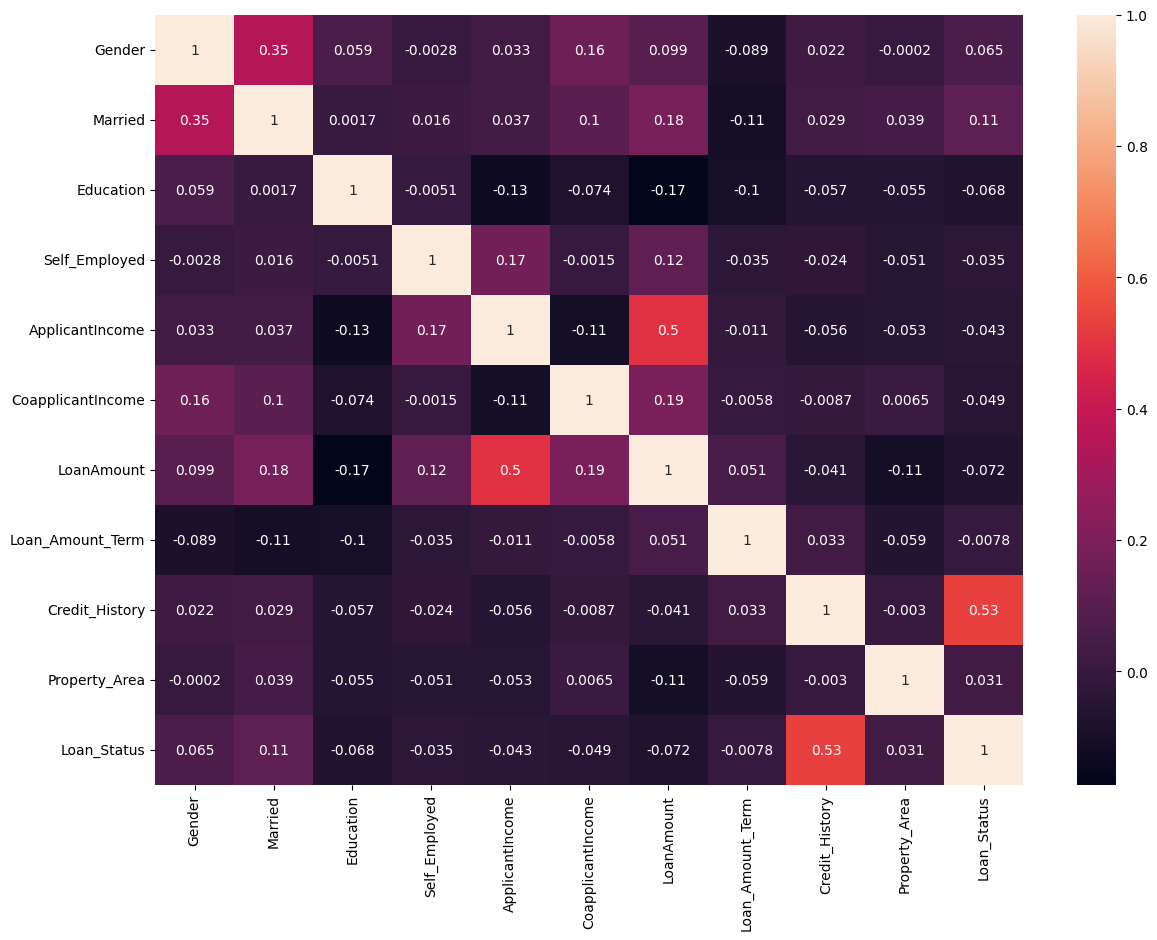

In [33]:
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True)

Positive Correlation (top): 

---------------------

As one variable increases, the other tends to increase as well. 


Negative Correlation (bottom): 

---------------------

As one variable increases, the other tends to decrease. 


No Correlation: 

---------------

Increase or decrease in a variable has no effect on the other variables.

<Axes: xlabel='Education', ylabel='count'>

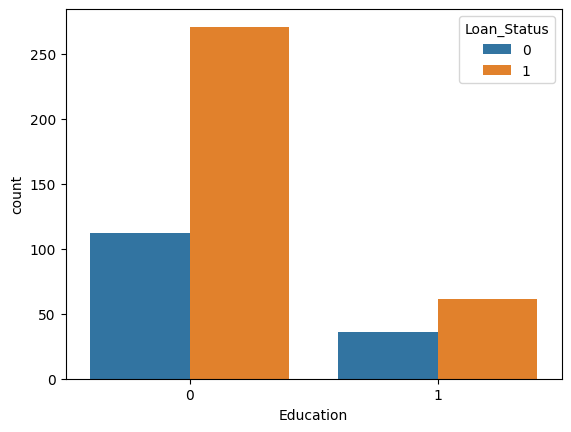

In [34]:
sns.countplot(x="Education", hue="Loan_Status", data=ds)

On the x axis, 0 - graduate; 1 - non graduate

<Axes: xlabel='Married', ylabel='count'>

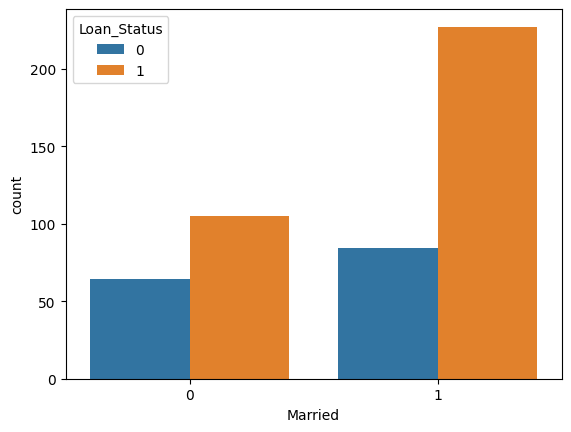

In [35]:
sns.countplot(x="Married", hue="Loan_Status", data=ds)

On the x axis, 0 - no, 1 - yes

<Axes: xlabel='Gender', ylabel='count'>

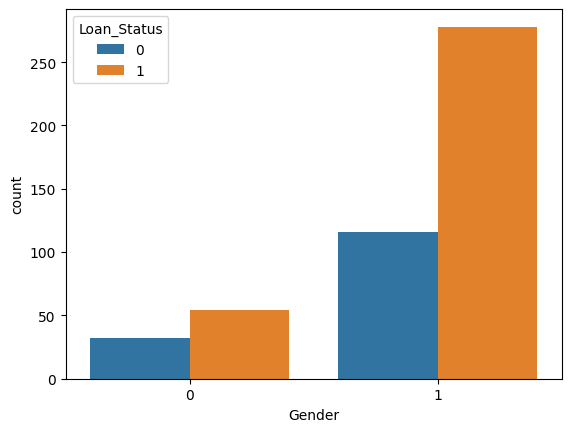

In [36]:
sns.countplot(x="Gender", hue="Loan_Status", data=ds)

On the x axis, 0 - female, 1 - male

<Axes: xlabel='Self_Employed', ylabel='count'>

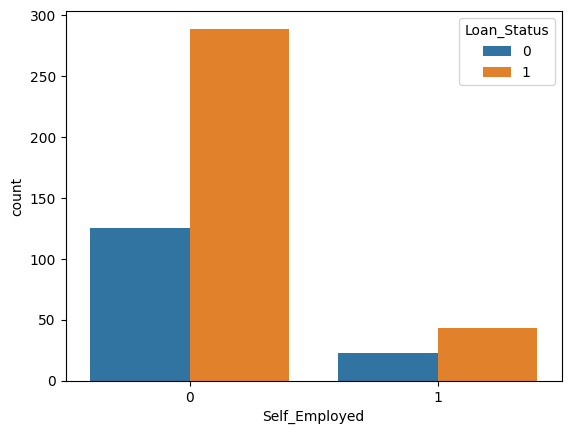

In [37]:
sns.countplot(x="Self_Employed", hue="Loan_Status", data=ds)

On the x axis, 0 - no, 1 - yes

<Axes: xlabel='Loan_Amount_Term', ylabel='count'>

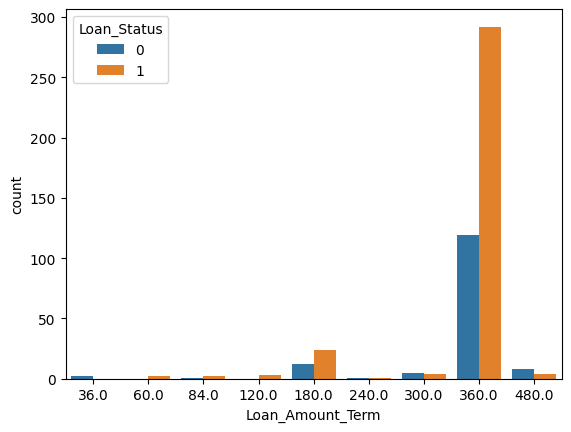

In [38]:
sns.countplot(x="Loan_Amount_Term", hue="Loan_Status", data=ds)

<Axes: xlabel='Credit_History', ylabel='count'>

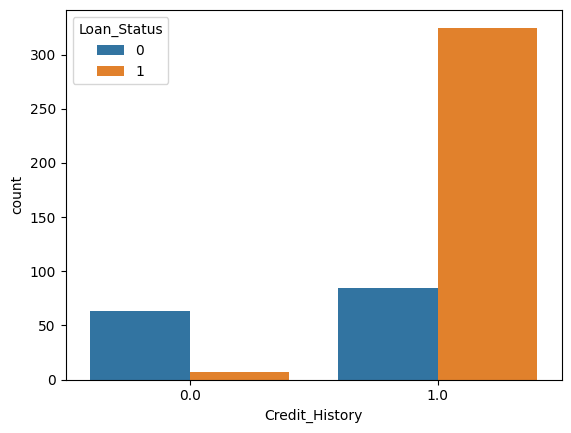

In [39]:
sns.countplot(x="Credit_History", hue="Loan_Status", data=ds)

On the x axis, 0 - no, 1 - yes

<Axes: xlabel='Property_Area', ylabel='count'>

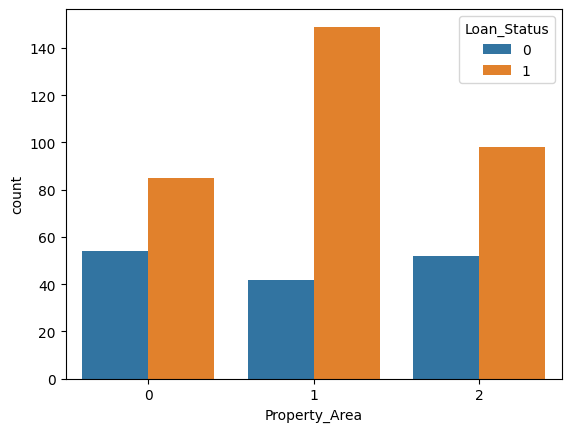

In [40]:
sns.countplot(x="Property_Area", hue="Loan_Status", data=ds)

On the x axis, 0 - rural, 1 - semiurban, 2 - urban

x is independent variable and y is dependent variable

In [41]:
ds.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [42]:
x = ds.iloc[:, 1:12]
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2


In [43]:
type(x)

pandas.core.frame.DataFrame

In [44]:
y = ds["Loan_Status"]
y.head()

1    0
2    1
3    1
4    1
5    1
Name: Loan_Status, dtype: int32

In [45]:
type(y)

pandas.core.series.Series

# Standard Scaling

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
ss = StandardScaler()

In [48]:
ss

StandardScaler()

In [49]:
x_scaled = pd.DataFrame(ss.fit_transform(x), columns=x.columns)

In [50]:
x_scaled

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.467198,0.737162,0.112352,-0.503253,-0.399275,-0.137970,-0.027952,-0.208089,0.275542,0.413197,-1.318868
1,0.467198,0.737162,-0.704755,-0.503253,2.504541,-0.417536,-0.604633,-0.979001,0.275542,0.413197,1.259774
2,0.467198,0.737162,-0.704755,1.987072,-0.399275,-0.491180,0.297100,-0.307562,0.275542,0.413197,1.259774
3,0.467198,-1.356553,-0.704755,-0.503253,-0.399275,0.112280,-0.604633,-0.046446,0.275542,0.413197,1.259774
4,0.467198,0.737162,0.929459,-0.503253,2.504541,0.009319,0.999978,1.520245,0.275542,0.413197,1.259774
...,...,...,...,...,...,...,...,...,...,...,...
475,-2.140419,-1.356553,-0.704755,-0.503253,-0.399275,-0.435196,-0.604633,-0.916831,0.275542,0.413197,-1.318868
476,0.467198,0.737162,2.563673,-0.503253,-0.399275,-0.222210,-0.604633,-1.302286,-2.487549,0.413197,-1.318868
477,0.467198,0.737162,0.112352,-0.503253,-0.399275,0.478206,-0.512854,1.346168,0.275542,0.413197,1.259774
478,0.467198,0.737162,0.929459,-0.503253,-0.399275,0.391846,-0.604633,0.525520,0.275542,0.413197,1.259774


# Training and testing split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0, stratify=y)

In [53]:
x_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
400,0.467198,0.737162,-0.704755,-0.503253,-0.399275,-0.571182,1.944542,-0.929265,-2.487549,0.413197,-0.029547
381,0.467198,0.737162,0.929459,-0.503253,2.504541,-0.137970,0.191936,0.189801,0.275542,0.413197,-0.029547
332,0.467198,0.737162,-0.704755,-0.503253,-0.399275,-0.476522,1.039749,-0.295128,0.275542,0.413197,-1.318868
88,-2.140419,0.737162,-0.704755,-0.503253,-0.399275,-0.388043,0.268419,0.115196,0.275542,0.413197,-0.029547
124,0.467198,0.737162,-0.704755,-0.503253,-0.399275,0.453658,-0.604633,1.619718,0.275542,0.413197,1.259774


In [54]:
y_train.head()

513    0
488    1
425    1
116    1
161    0
Name: Loan_Status, dtype: int32

In [55]:
x_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
313,-2.140419,-1.356553,-0.704755,1.987072,-0.399275,-0.600676,-0.604633,-1.140644,0.275542,0.413197,-0.029547
369,0.467198,-1.356553,0.929459,-0.503253,-0.399275,0.029629,1.172829,0.214669,0.275542,0.413197,-1.318868
367,0.467198,0.737162,0.112352,1.987072,-0.399275,-0.478818,-0.031011,-0.394600,-2.487549,-2.420153,-1.318868
119,0.467198,-1.356553,-0.704755,-0.503253,-0.399275,-0.372678,-0.604633,-1.177946,0.275542,0.413197,1.259774
71,0.467198,0.737162,-0.704755,-0.503253,-0.399275,-0.424953,0.504369,-0.170787,0.275542,0.413197,-0.029547


In [56]:
y_test.head()

403    1
474    1
471    0
154    1
90     1
Name: Loan_Status, dtype: int32

In [57]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((384, 11), (96, 11), (384,), (96,))

# Building the model

In [58]:
from sklearn import svm

In [59]:
model  = svm.SVC(kernel="linear", C=1)
model

SVC(C=1, kernel='linear')

In [60]:
model.fit(x_train, y_train)

SVC(C=1, kernel='linear')

# Model evaluation

In [61]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [62]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8229166666666666
Confusion Matrix:
 [[13 17]
 [ 0 66]]


In [63]:
tp = cm[0][0]
fn = cm[1][0]
fp = cm[0][1]
tn = cm[1][1]

In [64]:
accuracy = (tp + tn) / (tp + tn + fp + fn)
accuracy

0.8229166666666666

In [65]:
precision = tp / (tp + fp)
precision

0.43333333333333335

In [66]:
recall = tp / (tp + fn)
recall

1.0

In [67]:
f1_score = 2 * ( precision * recall ) / ( precision + recall )
f1_score

0.6046511627906976

In [68]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.43      0.60        30
           1       0.80      1.00      0.89        66

    accuracy                           0.82        96
   macro avg       0.90      0.72      0.75        96
weighted avg       0.86      0.82      0.80        96



Our model has an accuracy of about 82% which is good but we can improve it

# Hyperparameter tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

In [71]:
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(C=1, kernel='linear'),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [72]:
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_

In [73]:
best_params

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [74]:
best_svm_model

SVC(C=0.1, gamma=0.1, kernel='linear')

In [75]:
y_pred = best_svm_model.predict(x_test)

In [76]:
y_pred

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0])

In [77]:
y_test

403    1
474    1
471    0
154    1
90     1
      ..
569    0
603    1
242    1
549    1
179    0
Name: Loan_Status, Length: 96, dtype: int32

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 0.8229166666666666
Confusion Matrix:
 [[13 17]
 [ 0 66]]


Since out performance metrics are not changing, this is the best model we've got

# Save the model

In [80]:
import pickle

In [81]:
with open('loan_status_pred.pkl', 'wb') as file:
    pickle.dump(model, file)